# *dandelion* Notebook-3b
![dandelion_logo](img/dandelion_logo.png)

## Plotting tools

As shown in notebook 3a, dandelion can plot the BCR network and also integrate with scanpy to use their plotting modules. This notebook will now show some other plotting tools for looking at BCR-seq analysis.

In [1]:
import os
import pandas as pd
os.chdir(os.path.expanduser('/Users/kt16/Documents/Github/dandelion'))
import dandelion as ddl
# change directory to somewhere more workable
os.chdir(os.path.expanduser('/Users/kt16/Documents/Clatworthy_scRNAseq/Ondrej/PIP/'))

/Users/kt16/miniconda3/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


I will work with the same example from the previous notebook for convenience.

#### Loading saved dandelion object

In [2]:
network = ddl.utl.Dandelion.load('Pan_immune_BCR/Pan_T7918901/dandelion/data/dandelion_results.pkl')

Because I've updated `dandelion` with a few extra options since the last time this file was saved, I will use the utility function `utl.initialize_metadata` to reinitialise and update my metadata slot.

In [3]:
ddl.utl.initialize_metadata(network)
network.metadata

,clone_id,clone_group_id,isotype,lightchain,productive,heavy_multi,light_multi,heavychain_v_gene,lightchain_v_gene,heavychain_j_gene,...,mu_freq_seq_s,mu_freq_seq_r_IGH,mu_freq_seq_s_IGH,mu_freq_IGH,mu_freq_seq_r_IGL,mu_freq_seq_s_IGL,mu_freq_IGL,mu_freq_seq_r_IGK,mu_freq_seq_s_IGK,mu_freq_IGK
cell_id,,,,,,,,,,,,,,,,,,,,,
Pan_T7917815_ACCTTTATCGCTTGTC,46_1_1,46,IGHG2,IGKC,TRUE,True,False,"IGHV3-30,IGHV3-21",IGKV1D-12,IGHJ4,...,0.068318,0.021084,0.015060,0.036145,NaN,NaN,NaN,0.058140,0.046512,0.104651
Pan_T7917815_ACTGCTCCAGGTCGTC,29_2_1,29,IGHM,IGKC,TRUE,False,False,IGHV3-21,IGKV3-20,IGHJ4,...,0.030637,0.077844,0.041916,0.119760,NaN,NaN,NaN,0.045732,0.024390,0.070122
Pan_T7917815_CCTACCAGTGCCTTGG,19_4_1,19,IGHG3,IGKC,TRUE,False,False,IGHV4-34,IGKV3-11,IGHJ4,...,0.042909,0.075145,0.011561,0.086705,NaN,NaN,NaN,0.021505,0.043011,0.064516
Pan_T7917815_CGATCGGAGGGCTCTC,71_1_1,71,IGHG2,IGKC,TRUE,True,False,"IGHV1-69,IGHV1-69D",IGKV3-20,IGHJ4,...,0.054455,0.045045,0.012012,0.057057,NaN,NaN,NaN,0.044643,0.038690,0.083333
Pan_T7917815_CGGACGTTCTTTAGGG,52_2_1,52,IGHG2,IGKC,TRUE,False,True,IGHV4-59,"IGKV1D-39,IGKV1-39",IGHJ5,...,0.061702,0.075802,0.014577,0.090379,NaN,NaN,NaN,0.060519,0.034582,0.095101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pan_T7917815_GCAGCCAAGTATTGGA,14_1_1,14,IGHG1,IGKC,TRUE,False,False,IGHV4-28,IGKV3-15,IGHJ4,...,0.003086,0.021583,0.014388,0.035971,NaN,NaN,NaN,0.009259,0.018519,0.027778
Pan_T7917815_GTACTCCGTAGTAGTA,58_1_1,58,NaN,IGLC3,TRUE,False,False,IGHV2-5,IGLV3-19,IGHJ4,...,0.036420,0.000000,0.009259,0.009259,0.025559,0.00639,0.031949,NaN,NaN,NaN
Pan_T7917815_TTGCCGTCAAGTCTGT,63_2_1,63,IGHA2,IGKC,TRUE,False,False,IGHV3-49,IGKV1-27,IGHJ4,...,0.035733,0.022364,0.006390,0.028754,NaN,NaN,NaN,0.015432,0.003086,0.018519


`utl.initialize_metadata` can also be used to retrieve columns from the data slot that isn't automatically transferred over. This can then be transferred to scanpy with `tl.transfer_network` as shown in the previous notebook. 

For example, if I want to retrieve the CDR3 junction amino acid sequences:

In [4]:
ddl.utl.initialize_metadata(network, retrieve = 'junction_aa')
network.metadata

,clone_id,clone_group_id,isotype,lightchain,productive,heavy_multi,light_multi,heavychain_v_gene,lightchain_v_gene,heavychain_j_gene,...,mu_freq_seq_s_IGH,mu_freq_IGH,mu_freq_seq_r_IGL,mu_freq_seq_s_IGL,mu_freq_IGL,mu_freq_seq_r_IGK,mu_freq_seq_s_IGK,mu_freq_IGK,junction_aa_heavychain,junction_aa_lightchain
cell_id,,,,,,,,,,,,,,,,,,,,,
Pan_T7917815_ACCTTTATCGCTTGTC,46_1_1,46,IGHG2,IGKC,TRUE,True,False,"IGHV3-30,IGHV3-21",IGKV1D-12,IGHJ4,...,0.015060,0.036145,NaN,NaN,NaN,0.058140,0.046512,0.104651,CASDPPTAGDYGGGADFDYW,CLQGESYPLTF
Pan_T7917815_ACTGCTCCAGGTCGTC,29_2_1,29,IGHM,IGKC,TRUE,False,False,IGHV3-21,IGKV3-20,IGHJ4,...,0.041916,0.119760,NaN,NaN,NaN,0.045732,0.024390,0.070122,CARGERAAVTTYW,CQHFGSSSWTF
Pan_T7917815_CCTACCAGTGCCTTGG,19_4_1,19,IGHG3,IGKC,TRUE,False,False,IGHV4-34,IGKV3-11,IGHJ4,...,0.011561,0.086705,NaN,NaN,NaN,0.021505,0.043011,0.064516,CAVPKDGSGWGTFHHW,CQQRSNWPPLTF
Pan_T7917815_CGATCGGAGGGCTCTC,71_1_1,71,IGHG2,IGKC,TRUE,True,False,"IGHV1-69,IGHV1-69D",IGKV3-20,IGHJ4,...,0.012012,0.057057,NaN,NaN,NaN,0.044643,0.038690,0.083333,CAKWAAICESGDCYEVSFDYW,CQQVFSSPQTF
Pan_T7917815_CGGACGTTCTTTAGGG,52_2_1,52,IGHG2,IGKC,TRUE,False,True,IGHV4-59,"IGKV1D-39,IGKV1-39",IGHJ5,...,0.014577,0.090379,NaN,NaN,NaN,0.060519,0.034582,0.095101,CARRYYDSGGPFDPW,CQQSFTTPHTF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pan_T7917815_GCAGCCAAGTATTGGA,14_1_1,14,IGHG1,IGKC,TRUE,False,False,IGHV4-28,IGKV3-15,IGHJ4,...,0.014388,0.035971,NaN,NaN,NaN,0.009259,0.018519,0.027778,CARSPPIQRWGRRAFLDYW,CQQYHNWPPLTF
Pan_T7917815_GTACTCCGTAGTAGTA,58_1_1,58,NaN,IGLC3,TRUE,False,False,IGHV2-5,IGLV3-19,IGHJ4,...,0.009259,0.009259,0.025559,0.00639,0.031949,NaN,NaN,NaN,CAQRREEFDYW,CNSRDPSAYWVF
Pan_T7917815_TTGCCGTCAAGTCTGT,63_2_1,63,IGHA2,IGKC,TRUE,False,False,IGHV3-49,IGKV1-27,IGHJ4,...,0.006390,0.028754,NaN,NaN,NaN,0.015432,0.003086,0.018519,CTRDRRYDVWDGSERVDYW,CQKYSNVPWTF


Now on to plotting.

## *barplot*
`pl.barplot` is a generic barplot function that will plot items in the metadata slot as a bar plot. This function will also interact with `AnnData` *.obs* slot if a scanpy object is used in place of `dandelion` object.

(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1277be990>)

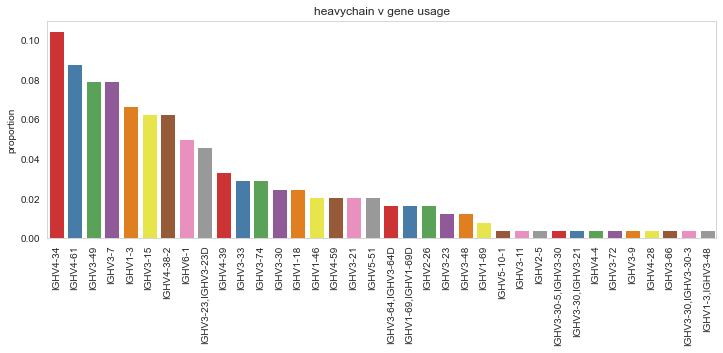

In [5]:
ddl.pl.barplot(network, variable = 'heavychain_v_gene', figsize = (12, 4))

You can prevent it from sorting by specifying `sort_descending = None`. Colours can be changed with `palette` option.

(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127a43e90>)

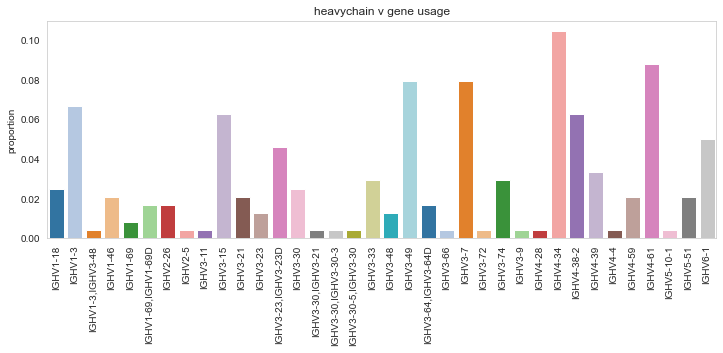

In [6]:
ddl.pl.barplot(network, variable = 'heavychain_v_gene', figsize = (12, 4), sort_descending = None, palette = 'tab20')

Specifying `normalize = False` will change the y-axis to counts.

(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127c15dd0>)

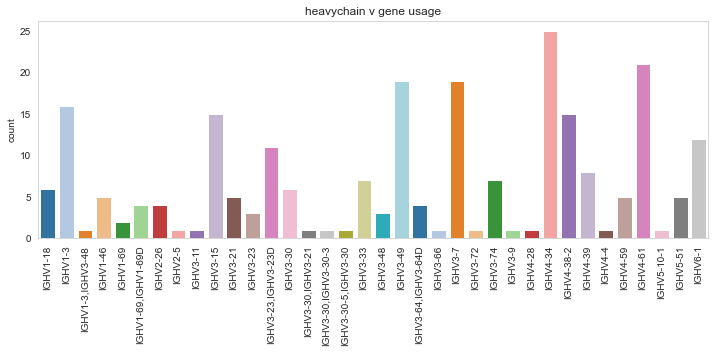

In [7]:
ddl.pl.barplot(network, variable = 'heavychain_v_gene', normalize = False, figsize = (12, 4), sort_descending = None, palette = 'tab20')

## *stackedbarplot*
`pl.stackedbarplot` is similar to above but can split between specified groups. Some examples below:

(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1274a9b90>)

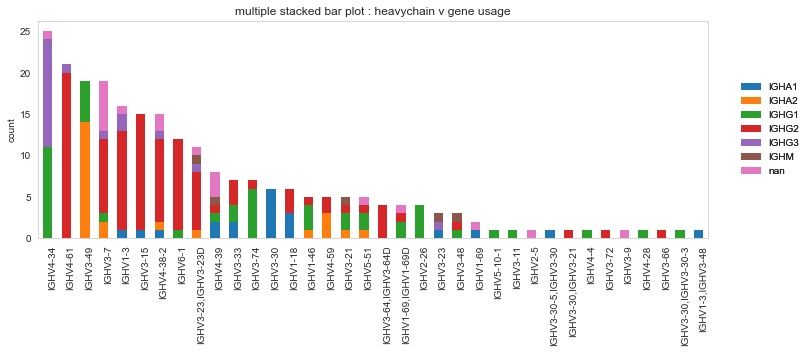

In [8]:
ddl.pl.stackedbarplot(network, variable = 'heavychain_v_gene', groupby = 'isotype')

Specifying `normalize = True` will scale the values for each gene to range from 0 to 1 for all the 'groups':

(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12849e950>)

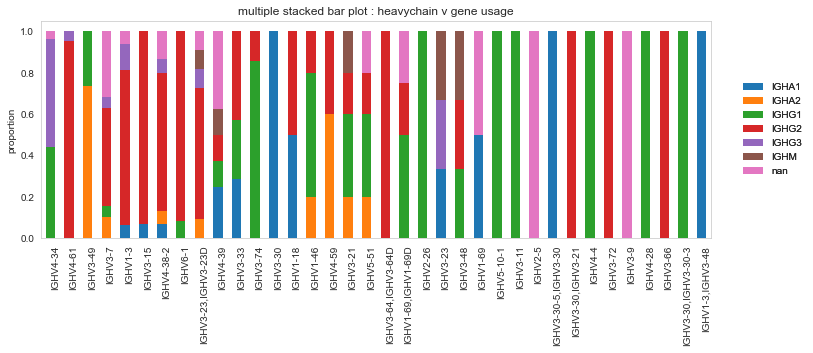

In [9]:
ddl.pl.stackedbarplot(network, variable = 'heavychain_v_gene', groupby = 'isotype', normalize = True)

Another example to show cells containing multiple IGH-V/J or IGK- or IGL-V/J genes. They are flagged as True in the corresponding `multi` columns in the meta data.

(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12893e110>)

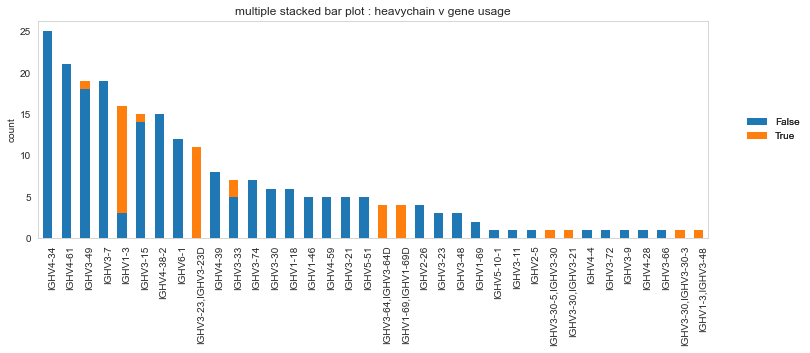

In [10]:
ddl.pl.stackedbarplot(network, variable = 'heavychain_v_gene', groupby = 'heavy_multi')

It's obviously more useful if you don't have too many groups, but you could try and plot everything and jiggle the legend options and color.

(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x128c19090>)

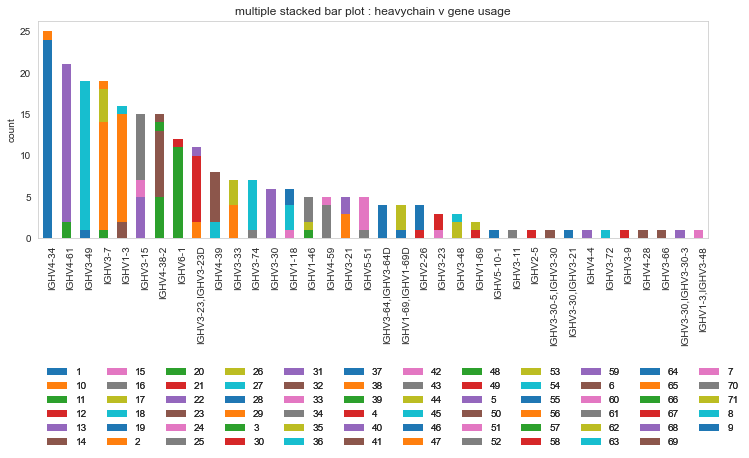

In [11]:
ddl.pl.stackedbarplot(network, variable = 'heavychain_v_gene', groupby = 'clone_group_id', legend_options = ('lower left', (0, -1), 12))

## *spectratypeplot*
Spectratype plots contain info displaying CDR3 length distribution for specified groups. For this function, the current method only works for `dandelion` objects as it requires access to the *.data* slot but that might change in the future.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12a863f90>)

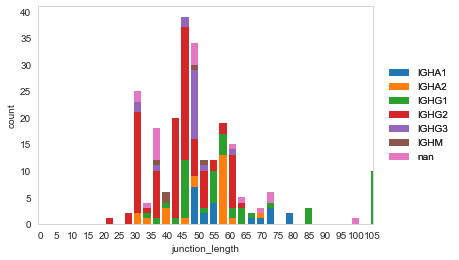

In [12]:
ddl.pl.spectratypeplot(network, variable = 'junction_length', groupby = 'c_call', locus='IGH', width = 2.3)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b755e50>)

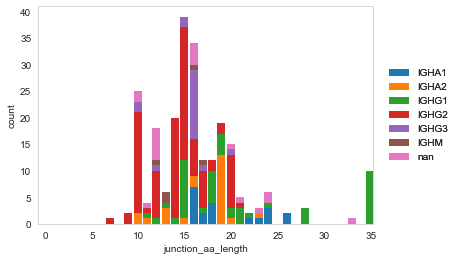

In [13]:
ddl.pl.spectratypeplot(network, variable = 'junction_aa_length', groupby = 'c_call', locus='IGH')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12bc358d0>)

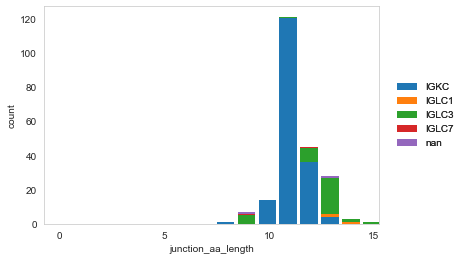

In [14]:
ddl.pl.spectratypeplot(network, variable = 'junction_aa_length', groupby = 'c_call', locus=['IGK','IGL'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12bea4d50>)

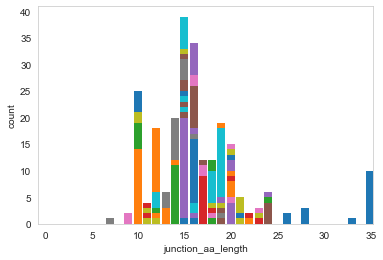

In [15]:
ddl.pl.spectratypeplot(network, variable = 'junction_aa_length', groupby = 'clone_group_id', locus='IGH', hide_legend = True)

That sums it up for now! Let me know if you have any ideas at [kt16@sanger.ac.uk] and I can try and see if i can implement it or we can work something out to collaborate on! 

The subsequent notebooks are just examples of how to interact through R reticulate and a short example on how to process 10x TCR data for other software(s).